In [126]:
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline

import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns

In [127]:
url = "https://raw.githubusercontent.com/jbrownlee/Datasets/master/pima-indians-diabetes.data.csv"
colonnes = [
    'Pregnancies',
    'Glucose',
    'BloodPressure',
    'SkinThickness',
    'Insulin',
    'BMI',
    'DiabetesPedigreeFunction',
    'Age',
    'Outcome'
]

df = pd.read_csv(url, names=colonnes)

print(f"Dimensions du dataset : {df.shape}")
print("\nPremières lignes :")
display(df.head())
print("\nInformations générales :")
df.info()
print("\nStatistiques descriptives :")
display(df.describe(include='all'))

Dimensions du dataset : (768, 9)

Premières lignes :


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1



Informations générales :
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB

Statistiques descriptives :


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [128]:
print(df['Outcome'].value_counts())

Outcome
0    500
1    268
Name: count, dtype: int64


In [129]:
print("Valeurs manquantes :")
print(df.isnull().sum())

Valeurs manquantes :
Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64


In [130]:
print(df.isnull().any(axis=1).sum())

0


In [131]:
duplicates = df.duplicated().sum()
print("Num des doublons:", duplicates)
df=df.drop_duplicates()
print(df.shape)

Num des doublons: 0
(768, 9)


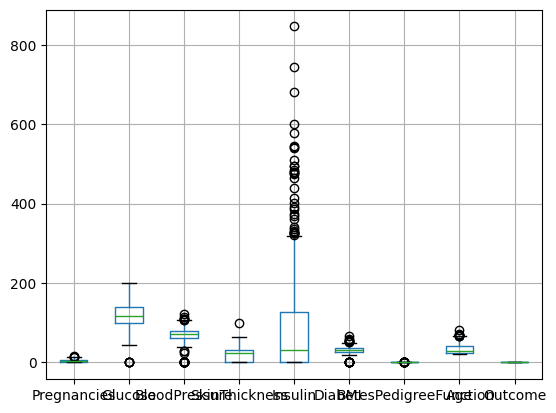

In [132]:
df.boxplot(column=["Pregnancies",	"Glucose",	"BloodPressure",	"SkinThickness",	"Insulin",	"BMI",	"DiabetesPedigreeFunction",	"Age",	"Outcome"])
plt.show()

In [133]:
correlation_matrix = df.corr()
display(correlation_matrix)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,1.000000,0.129459,0.141282,-0.081672,-0.073535,0.017683,-0.033523,0.544341,0.221898
Glucose,0.129459,1.000000,0.152590,0.057328,0.331357,0.221071,0.137337,0.263514,0.466581
BloodPressure,0.141282,0.152590,1.000000,0.207371,0.088933,0.281805,0.041265,0.239528,0.065068
SkinThickness,-0.081672,0.057328,0.207371,1.000000,0.436783,0.392573,0.183928,-0.113970,0.074752
Insulin,-0.073535,0.331357,0.088933,0.436783,1.000000,0.197859,0.185071,-0.042163,0.130548
BMI,0.017683,0.221071,0.281805,0.392573,0.197859,1.000000,0.140647,0.036242,0.292695
DiabetesPedigreeFunction,-0.033523,0.137337,0.041265,0.183928,0.185071,0.140647,1.000000,0.033561,0.173844
Age,0.544341,0.263514,0.239528,-0.113970,-0.042163,0.036242,0.033561,1.000000,0.238356
Outcome,0.221898,0.466581,0.065068,0.074752,0.130548,0.292695,0.173844,0.238356,1.000000


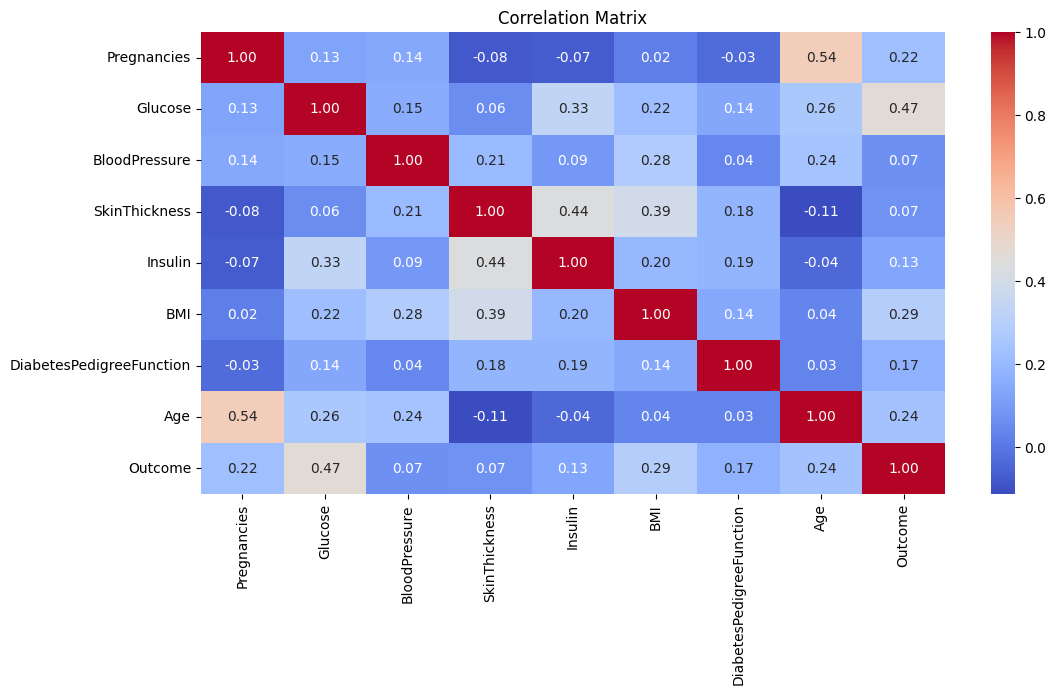

In [134]:
plt.figure(figsize=(12,6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Matrix")
plt.show()

(array([0, 1]), [Text(0, 0, '0'), Text(1, 0, '1')])

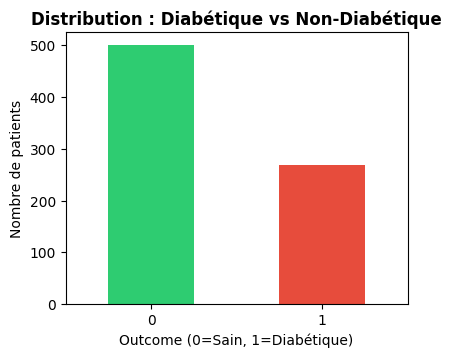

In [135]:
plt.figure(figsize=(15, 12))

plt.subplot(3, 3, 1)
df['Outcome'].value_counts().plot(kind='bar', color=['#2ecc71', '#e74c3c'])
plt.title('Distribution : Diabétique vs Non-Diabétique', fontsize=12, fontweight='bold')
plt.xlabel('Outcome (0=Sain, 1=Diabétique)')
plt.ylabel('Nombre de patients')
plt.xticks(rotation=0)

In [136]:
from imblearn.over_sampling import SMOTE

X = df.drop('Outcome', axis=1)
y = df['Outcome']

smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)

print(f" Avant SMOTE : {sum(y == 0)} sains, {sum(y == 1)} diabétiques")
print(f" Après SMOTE : {sum(y_resampled == 0)} sains, {sum(y_resampled == 1)} diabétiques")

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    X_resampled, y_resampled, test_size=0.2, random_state=42, stratify=y_resampled
)

 Avant SMOTE : 500 sains, 268 diabétiques
 Après SMOTE : 500 sains, 500 diabétiques


In [137]:
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [138]:
from sklearn.model_selection import GridSearchCV

In [139]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, roc_auc_score

In [140]:
from sklearn.ensemble import RandomForestClassifier
rf_params = {
    'n_estimators': [100, 200],
    'max_depth': [10, 20, None],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2]
}

rf = RandomForestClassifier(random_state=42, class_weight='balanced')
rf_grid = GridSearchCV(rf, rf_params, cv=5, scoring='roc_auc', n_jobs=-1, verbose=0)
rf_grid.fit(X_train, y_train)

y_pred1 = rf_grid.predict(X_test)

print(f" Meilleurs paramètres : {rf_grid.best_params_}")
print(f" Meilleur score (AUC) : {rf_grid.best_score_:.4f}")

 Meilleurs paramètres : {'max_depth': 20, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100}
 Meilleur score (AUC) : 0.8954


In [141]:
from sklearn.neighbors import KNeighborsClassifier
knn_params = {
    'n_neighbors': [3, 5, 7, 9, 11, 15],
    'weights': ['uniform', 'distance'],
    'metric': ['euclidean', 'manhattan']
}

knn = KNeighborsClassifier()
knn_grid = GridSearchCV(knn, knn_params, cv=5, scoring='roc_auc', n_jobs=-1, verbose=0)
knn_grid.fit(X_train, y_train)
y_pred2 = knn_grid.predict(X_test)

print(f" Meilleurs paramètres : {knn_grid.best_params_}")
print(f" Meilleur score (AUC) : {knn_grid.best_score_:.4f}")

 Meilleurs paramètres : {'metric': 'manhattan', 'n_neighbors': 15, 'weights': 'distance'}
 Meilleur score (AUC) : 0.8518


In [142]:
!pip install catboost

In [143]:
from catboost import CatBoostClassifier

model = CatBoostClassifier(
    iterations=500,
    depth=6,
    learning_rate=0.05,
    loss_function='Logloss',
    verbose=0
)

model.fit(X_train, y_train)
y_pred3 = model.predict(X_test)
print(f"Accuracy :  {accuracy_score(y_test, y_pred3):.4f}")

Accuracy :  0.8050


In [144]:
def evaluate_model(y_true, y_pred, model_name):
    return {
        'Modèle': model_name,
        'Accuracy': accuracy_score(y_true, y_pred),
        'Precision': precision_score(y_true, y_pred),
        'Recall': recall_score(y_true, y_pred),
        'F1-score': f1_score(y_true, y_pred)
    }

results = []
results.append(evaluate_model(y_test, y_pred1, 'RandomForestClassifier'))
results.append(evaluate_model(y_test, y_pred2, 'KNeighborsClassifier'))
results.append(evaluate_model(y_test, y_pred3, 'CatBoostClassifier'))

results_df = pd.DataFrame(results)
print(results_df.round(4))

                   Modèle  Accuracy  Precision  Recall  F1-score
0  RandomForestClassifier     0.820     0.7963    0.86    0.8269
1    KNeighborsClassifier     0.795     0.7398    0.91    0.8161
2      CatBoostClassifier     0.805     0.7798    0.85    0.8134


In [145]:
import joblib

joblib.dump(rf_grid.best_estimator_, 'best_rf_model.pkl')

['best_rf_model.pkl']